In [1]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


In [2]:
num_rows = 128
num_columns = 128
num_channels = 3

num_epochs = 100
num_batch_size = 13
num_speakers = 2
num_seconds = 2.9
fine_tune_at = 120
base_lr = 0.0001

In [3]:
featuresdf = data_load.make_dataframe_class_no(num_speakers, './Dataset/wav/', num_rows, num_columns, num_seconds)

Finished feature extraction from  208  files


In [4]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]

In [5]:
base_model = learn.get_mobilenet(num_rows, num_columns, num_channels, fine_tune_at)

Number of layers in the base model:  155
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
______________________________________

In [6]:
model = learn.build_model_mobilenet(base_model, num_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 1,627,458
Non-trainable params: 633,088
_________________________________________________________________


In [7]:
learn.compile_model_mobilenet(model, base_lr)

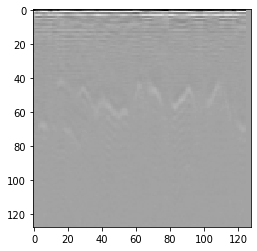

In [8]:
path = 'C:/Users/Maria/Documents/Licenta/Proiect/Dataset/wav/id10001/9mQ11vBs1wc/00004.wav'
render.show_mfccs(path, num_rows, num_columns, num_seconds)

In [9]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2]) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 1,627,458
Non-trainable params: 633,088
_________________________________________________________________
166/166 [==============================] - 3s 19ms/sample - loss: 0.9441 - accuracy: 0.3916
Pre-training accuracy: 39.1566%


In [10]:
history = learn.train_model(model, result_sets, num_epochs, num_batch_size, 'MobileNet1', 'default', 'MobileNet1')

Train on 166 samples, validate on 42 samples
Epoch 1/100
156/166 [===========================>..] - ETA: 0s - loss: 0.3974 - accuracy: 0.8269
Epoch 00001: val_loss improved from inf to 1.57876, saving model to saved_models/weights.best.MobileNet1.hdf5
166/166 [==============================] - 17s 100ms/sample - loss: 0.3905 - accuracy: 0.8253 - val_loss: 1.5788 - val_accuracy: 0.3095
Epoch 2/100
156/166 [===========================>..] - ETA: 0s - loss: 0.0600 - accuracy: 0.9872
Epoch 00002: val_loss did not improve from 1.57876
166/166 [==============================] - 12s 71ms/sample - loss: 0.0581 - accuracy: 0.9880 - val_loss: 1.6310 - val_accuracy: 0.3095
Epoch 3/100
156/166 [===========================>..] - ETA: 0s - loss: 0.0389 - accuracy: 0.9936
Epoch 00003: val_loss improved from 1.57876 to 0.89081, saving model to saved_models/weights.best.MobileNet1.hdf5
166/166 [==============================] - 12s 72ms/sample - loss: 0.0396 - accuracy: 0.9940 - val_loss: 0.8908 - val_

Epoch 29/100
156/166 [===========================>..] - ETA: 0s - loss: 2.8985e-05 - accuracy: 1.0000
Epoch 00029: val_loss did not improve from 0.40372
166/166 [==============================] - 11s 66ms/sample - loss: 2.7267e-05 - accuracy: 1.0000 - val_loss: 0.8678 - val_accuracy: 0.4762
Epoch 30/100
156/166 [===========================>..] - ETA: 0s - loss: 7.1968e-05 - accuracy: 1.0000
Epoch 00030: val_loss did not improve from 0.40372
166/166 [==============================] - 11s 65ms/sample - loss: 7.3792e-05 - accuracy: 1.0000 - val_loss: 0.8276 - val_accuracy: 0.5238
Epoch 31/100
156/166 [===========================>..] - ETA: 0s - loss: 3.9719e-04 - accuracy: 1.0000
Epoch 00031: val_loss did not improve from 0.40372
166/166 [==============================] - 11s 66ms/sample - loss: 3.7334e-04 - accuracy: 1.0000 - val_loss: 0.8505 - val_accuracy: 0.5000
Epoch 32/100
156/166 [===========================>..] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000
Epoch 00032: val_loss did 

Epoch 57/100
156/166 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 00057: val_loss improved from 0.37929 to 0.35013, saving model to saved_models/weights.best.MobileNet1.hdf5
166/166 [==============================] - 11s 68ms/sample - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3501 - val_accuracy: 0.8810
Epoch 58/100
156/166 [===========================>..] - ETA: 0s - loss: 1.1882e-04 - accuracy: 1.0000
Epoch 00058: val_loss did not improve from 0.35013
166/166 [==============================] - 11s 65ms/sample - loss: 1.1167e-04 - accuracy: 1.0000 - val_loss: 0.4053 - val_accuracy: 0.8571
Epoch 59/100
156/166 [===========================>..] - ETA: 0s - loss: 1.3283e-05 - accuracy: 1.0000
Epoch 00059: val_loss did not improve from 0.35013
166/166 [==============================] - 11s 65ms/sample - loss: 1.7048e-05 - accuracy: 1.0000 - val_loss: 0.3904 - val_accuracy: 0.8810
Epoch 60/100
156/166 [===========================>..] - ETA: 0s - los

156/166 [===========================>..] - ETA: 0s - loss: 3.7286e-05 - accuracy: 1.0000
Epoch 00084: val_loss did not improve from 0.22142
166/166 [==============================] - 13s 77ms/sample - loss: 3.5363e-05 - accuracy: 1.0000 - val_loss: 0.7857 - val_accuracy: 0.6905
Epoch 85/100
156/166 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000  
Epoch 00085: val_loss did not improve from 0.22142
166/166 [==============================] - 13s 77ms/sample - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.8965 - val_accuracy: 0.6905
Epoch 86/100
156/166 [===========================>..] - ETA: 0s - loss: 2.0397e-04 - accuracy: 1.0000
Epoch 00086: val_loss did not improve from 0.22142
166/166 [==============================] - 13s 80ms/sample - loss: 1.9170e-04 - accuracy: 1.0000 - val_loss: 1.4393 - val_accuracy: 0.6905
Epoch 87/100
156/166 [===========================>..] - ETA: 0s - loss: 6.8071e-04 - accuracy: 1.0000
Epoch 00087: val_loss did not improve fro

In [11]:
evaluate.evaluate_model(model, 'MobileNet1', result_sets)

Training Accuracy:  0.8012048
Testing Accuracy:  0.88095236


In [12]:
evaluate.display_metrics(model, 'MobileNet1', result_sets)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        29

    accuracy                           0.88        42
   macro avg       0.87      0.85      0.86        42
weighted avg       0.88      0.88      0.88        42

Confusion matrix: 
[[10  3]
 [ 2 27]]


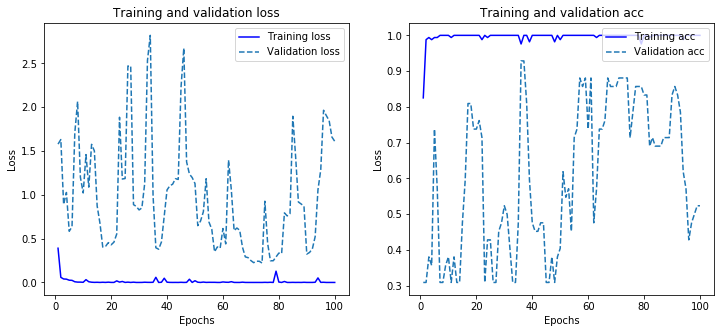

In [13]:
evaluate.plot_history(history)